In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import necessary libraries
import numpy as np
from PIL import Image
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd



In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Dog Vision/labels.csv")

unique_breeds = np.unique(data['breed'])



1/1 [==============================] - 2s 2s/step


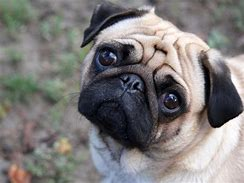

Predicted label: pug


In [ ]:


# Load the trained model
model_path='/content/drive/MyDrive/Dog Vision/models/20240426-14361714142174-full-image-set-mobilenetv2-Adam.h5'
model = model = tf.keras.models.load_model(model_path,
                                custom_objects={"KerasLayer":hub.KerasLayer})

# Load the input image
img=r"/content/drive/MyDrive/dog_images/dog_img10.jpeg"
org_img=Image.open(img)
input_image = Image.open(img)

# Preprocess the image
input_image = input_image.resize((224, 224))  # Resize the image
input_image = np.array(input_image) / 255.0  # Normalize pixel values

# Add an extra dimension to the image
input_image = np.expand_dims(input_image, axis=0)

# Predict the dog breed
prediction = model.predict(input_image)

# Get the predicted dog breed label
predicted_breed = np.argmax(prediction)  # Get the index of the highest probability

# Print the predicted dog breed


display(org_img)
print(f"Predicted label: {unique_breeds[np.argmax(prediction)]}")
